In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from numpy import loadtxt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import decomposition, datasets
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
import missingno as msno
import time
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
# Importing and reading train / test datasets
df = pd.read_csv('train.csv', error_bad_lines=False)
test = pd.read_csv('test.csv')
test_PassengerId = test["PassengerId"]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#Visualization first 4 cols of train dataset
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


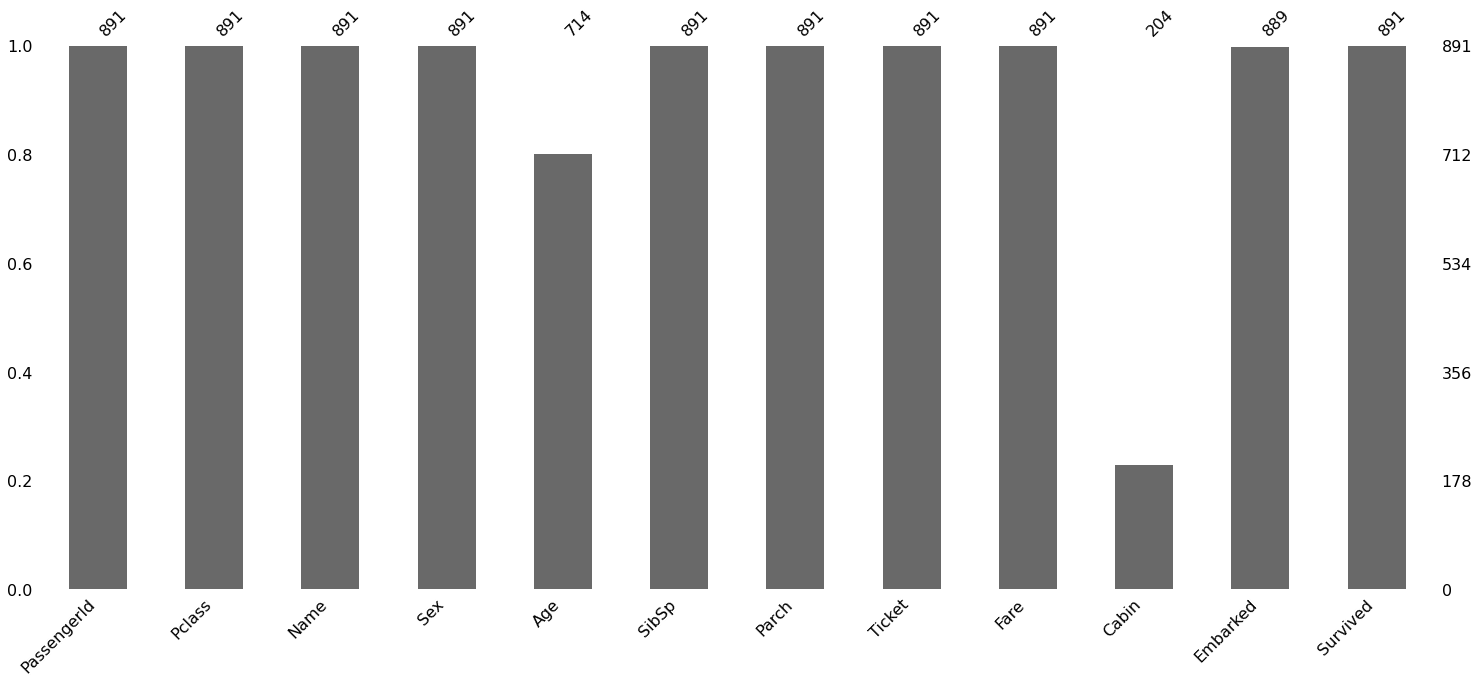

In [ ]:
#Checking missing data in train dataset
msno.bar(df)

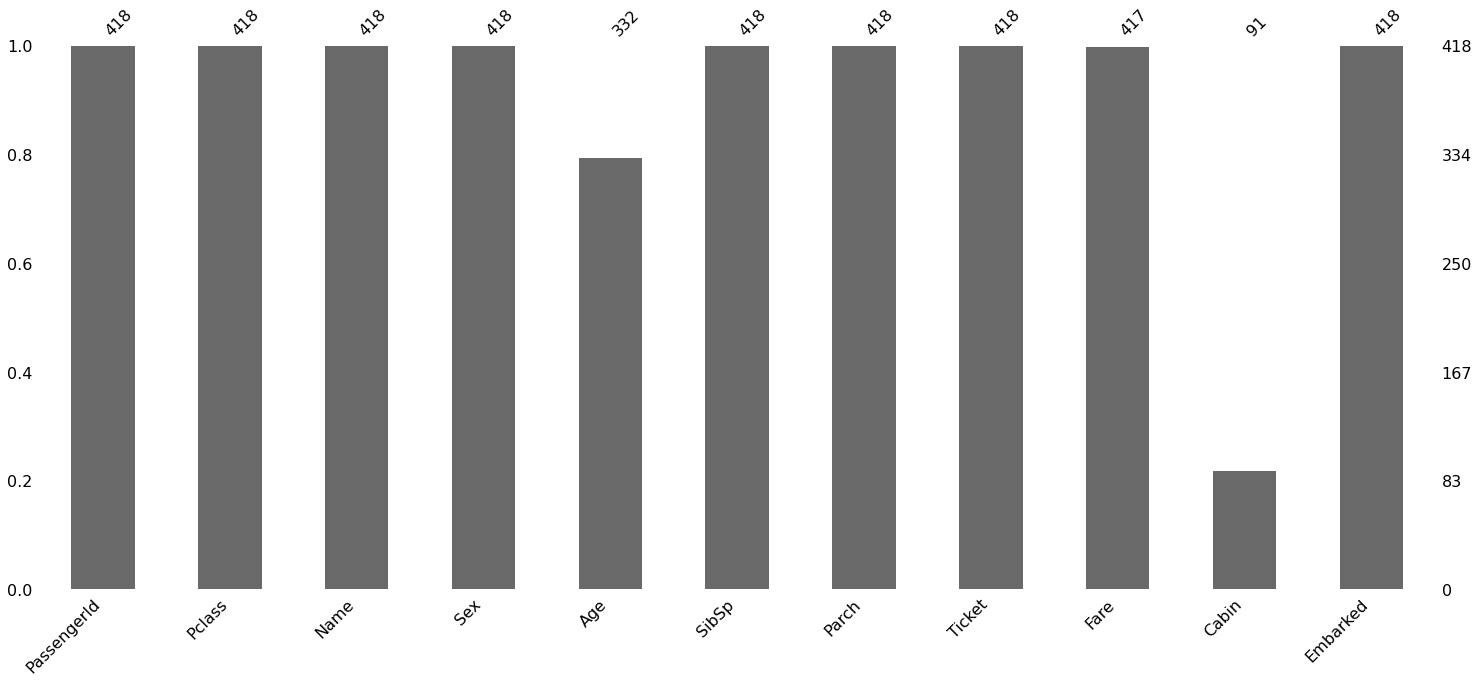

In [ ]:
#Checking missing data in train dataset
msno.bar(test)

Text(0.5, 1.0, 'Percentage of Missing Data')

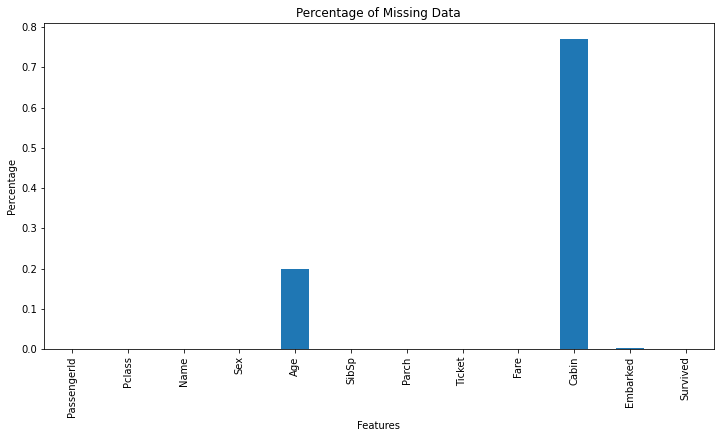

In [ ]:
# Visualization percentage of missing data in train dataset
df.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage')
plt.xlabel('Features')
plt.title('Percentage of Missing Data')

Text(0.5, 1.0, 'Percentage of Missing Data')

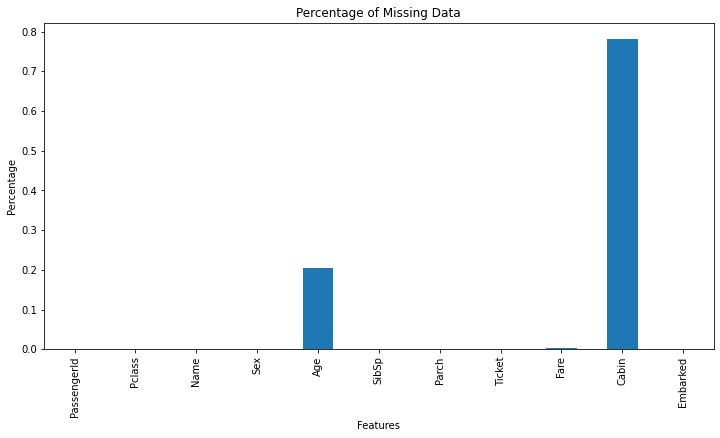

In [ ]:
# Visualization percentage of missing data in test dataset
test.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage')
plt.xlabel('Features')
plt.title('Percentage of Missing Data')

In [ ]:
# Indication train dataset dataframe types
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


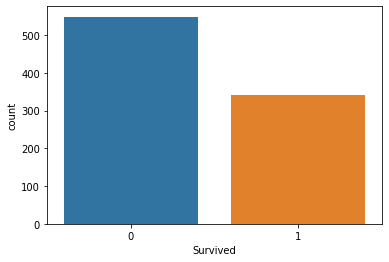

In [ ]:
# Exploring how many survived are have not 
sns.countplot(df['Survived'],label="Count")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

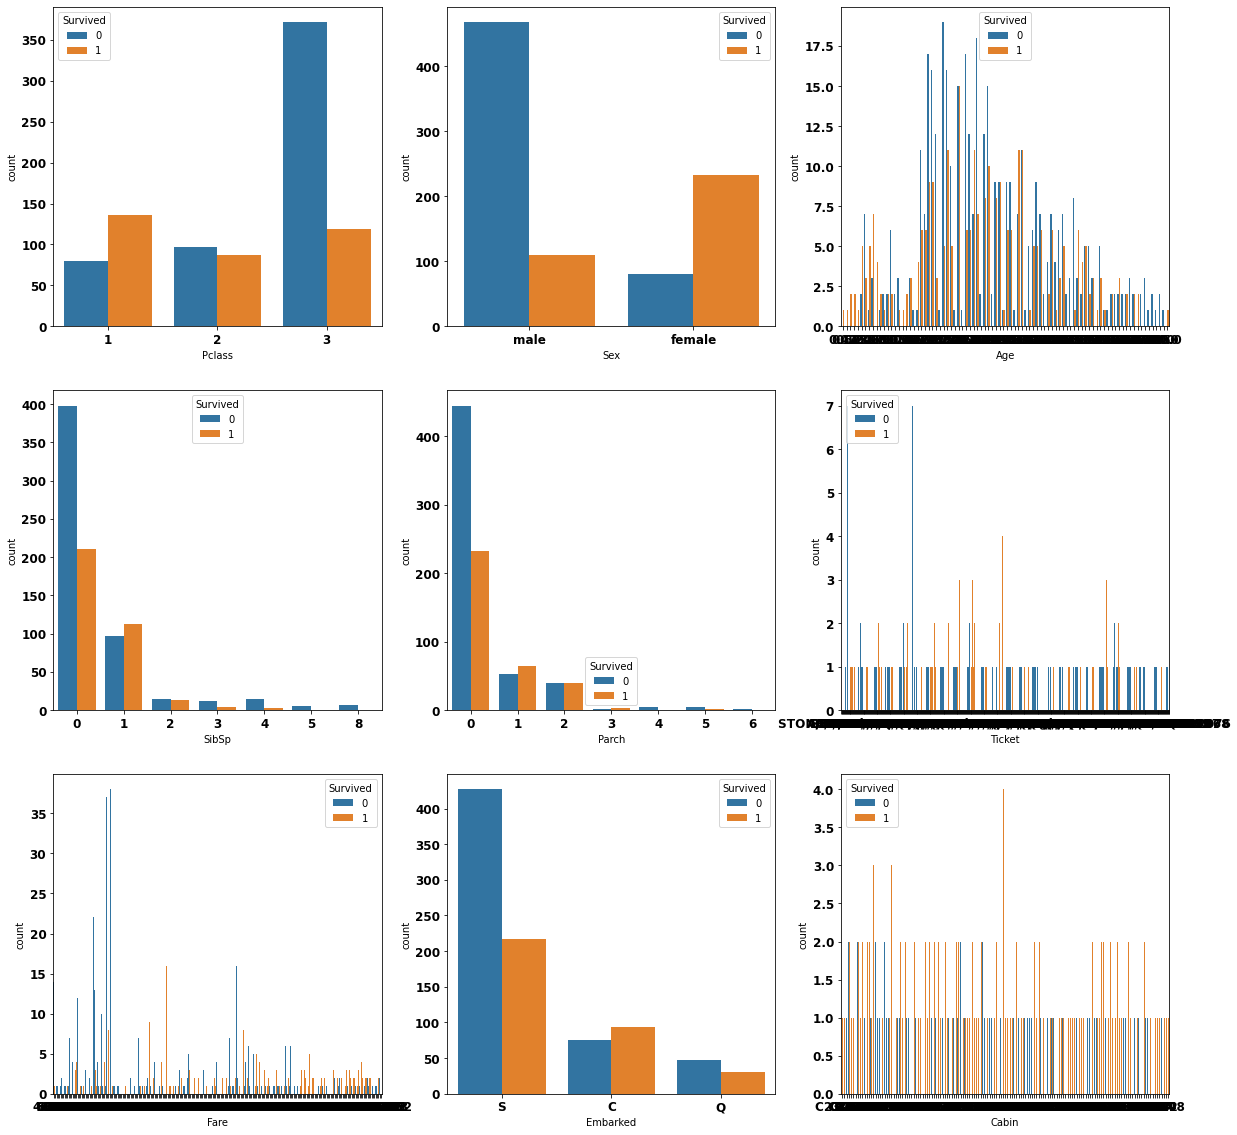

In [ ]:
# Visualization all features according to number of survived
cols = ['Pclass' , 'Sex' , 'Age' , 'SibSp' , 'Parch' , 'Ticket', 'Fare' , 'Embarked' , 'Cabin']
font={'weight' : 'bold',
        'size': 12}       
q=1
plt.figure(figsize=(20,20))
for j in cols:
    plt.subplot(3,3,q)
    ax=sns.countplot(df[j].dropna(),hue=df["Survived"])
    plt.xticks(**font)
    plt.yticks(**font)
    plt.xlabel(j)
    
    q+=1
plt.show()

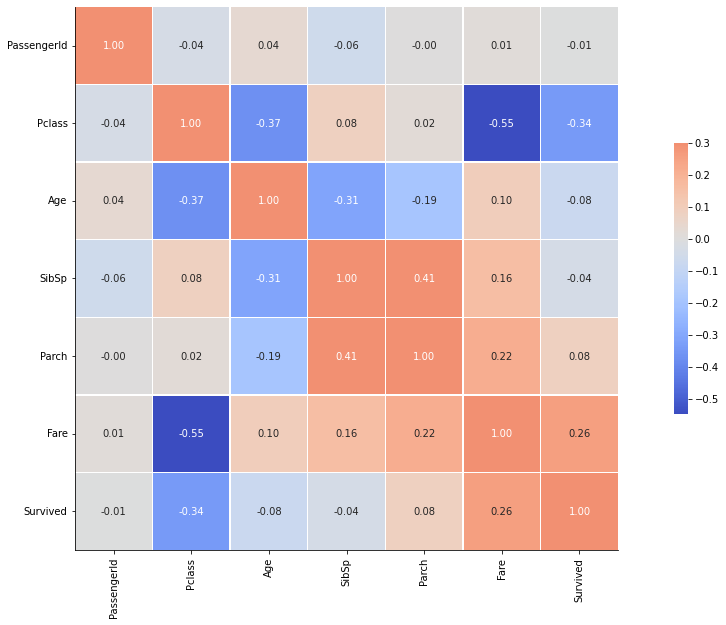

In [ ]:
# Exploring correlation between all features and each other
corr = df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(20,10)
plt.show()

In [ ]:
# Fixing missing data for both train and test dataset 
df["Fare"] = df["Fare"].fillna(value=df["Fare"].median())
test["Fare"] = test["Fare"].fillna(value=test["Fare"].median())

df["Age"] = df["Age"].fillna(value=df["Age"].mean())
test["Age"] = test["Age"].fillna(value=test["Age"].mean())

In [ ]:
# Label Encoding and dropping not important features
train_new  = df
train_new = train_new.drop(["Name","Survived", 'Ticket','Cabin','Embarked','PassengerId'],axis=1)
test_new = test
test_new = test_new.drop(["Name", 'Ticket','Cabin','Embarked','PassengerId'],axis=1)
y = df["Survived"]
#print(y)
label_encoding_cols=['Sex']
# Converting categorical cols into numerical in train dataset
for i in label_encoding_cols:
    train_new[i]=train_new[i].astype("category")
    train_new[i]=train_new[i].cat.codes
for j in label_encoding_cols:
    test_new[j]=test_new[j].astype("category")
    test_new[j]=test_new[j].cat.codes

In [ ]:
# Splitting train dataset into train and test 
x_train, x_test,y_train, y_test = train_test_split(train_new,y,test_size = 0.2,random_state=42)

In [ ]:
# Randomized Search for RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
# Use the random grid to search for best hyperparameters For RandomForestClassifer
# First create the base model to tune

rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 

# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(x_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: ignored

In [ ]:
# RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 2000, max_depth=60,min_samples_leaf=4,min_samples_split=2,max_features='auto',n_jobs=-1)
# Fitting the model
rf.fit(x_train, y_train)
# Getting the f1_score
print("The f1_score for the Random Forest Classifier is:")
f1_score(y_test, rf.predict(x_test))

The f1_score for the Random Forest Classifier is:


0.7313432835820896

In [ ]:
# LGBM Model
LBGM = lgb.LGBMClassifier( random_state=0, n_estimators=100, max_depth=6,learning_rate=0.05)
LBGM.fit(x_train, y_train)
LBGM_pred=LBGM.predict(x_test)
print("The f1_score for the LightBGM classifier is:")
f1_score(y_test, LBGM_pred)

The f1_score for the LightBGM classifier is:


0.7647058823529411

In [ ]:
# Use the gridcv to search for best hyperparameters for XGB classifier
param_test1 = {
    'n_estimators': [100,200,500,750,1000],
    'max_depth': [3,5,7,9],
    'min_child_weight': [1,3,5],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05, 0.1, 1],
    'learning_rate': [0.01, 0.02, 0.05, 0.1]
}

model = XGBClassifier()
grid_cv = GridSearchCV(model, param_test1, n_jobs=-1, cv=3)
pred = grid_cv.fit(x_train, y_train)
best_pars = grid_cv.best_params_

print(best_pars)
print("F1 Score:",f1_score(y_test, x_test))

KeyboardInterrupt: ignored

In [ ]:
# XGB Model
xg_cl = XGBClassifier(objective="binary:logistic", random_state=0, n_estimators=300, max_depth=6,learning_rate=0.05,n_jobs=-1)
# Fitting the model
xg_cl.fit(x_train, y_train)
# Getting the micro average f1_score 
print("The f1_score for the xgb classifier is:")
f1_score(y_test, xg_cl.predict(x_test))

The f1_score for the xgb classifier is:


0.7777777777777778

In [ ]:
# Predicting on the test dataset
predx=xg_cl.predict(test_new)

In [ ]:
# Creating Submission File
submission = pd.read_csv('gender_submission.csv')
submission = pd.DataFrame()
submission["PassengerId"] = test_PassengerId
submission["Survived"] = predx
submission.head()
submission.to_csv("submission.csv", index=False)